In [40]:
from langgraph.graph import START, END, StateGraph, add_messages
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from typing import TypedDict, Annotated
from langgraph.checkpoint.memory import MemorySaver
import os

In [41]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [42]:
LLM = ChatOpenAI(
    model="xiaomi/mimo-v2-flash:free",
    api_key=os.environ.get('OPEN_ROUTER_API_KEY'),
    base_url="https://openrouter.ai/api/v1",
    )

In [43]:
def chat_node(state):
    messages = state['messages']

    response = LLM.invoke(messages)

    return {'messages': [response]}

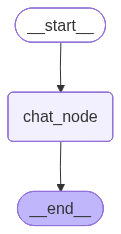

In [48]:
checkpointer  = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [45]:
initial_state = {'messages':[HumanMessage(content='capital of india?')]}
workflow.invoke(initial_state)['messages'][-1].content


'The official capital of India is **New Delhi**.\n\nHere are a few key details to distinguish it:\n\n*   **New Delhi:** This is a specific district within the larger metropolis of Delhi. It serves as the seat of all three branches of the Government of India (Executive, Legislature, and Judiciary).\n*   **Delhi:** The National Capital Territory (NCT) of Delhi is the larger metropolitan area that encompasses New Delhi.\n\nWhile Mumbai is the financial capital and Bangalore is the tech capital, New Delhi is the political and administrative center.'

In [50]:
while True:

    thread_id = '1'
    user_message = input('Ask any question...')
    print(f"You: {user_message}")

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable':{'thread_id': thread_id}}
    response = workflow.invoke({'messages': [HumanMessage(content=user_message)]}, config)
    print(f"AI: {response['messages'][-1].content}")

You: hi my name is bharat
AI: Hello again, Bharat! Nice to see you back. 

How can I help you today?
You: what is my name
AI: Your name is Bharat! 

You've introduced yourself as Bharat multiple times now. Is there something specific you'd like to chat about?
You: bye


In [51]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi, my name is bharat', additional_kwargs={}, response_metadata={}, id='f73f3545-3dd5-4430-8650-24aab286fb58'), AIMessage(content="Hello, Bharat! It's a pleasure to meet you. \n\nHow can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 45, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 0, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 0, 'upstream_inference_completions_cost': 0}}, 'model_provider': 'openai', 'model_name': 'xiaomi/mimo-v2-flash:free', 'system_fingerprint': None, 'id': 'gen-1767524330-lJoWSAhlhyvAF2ZwTSgy', 'finish_reason': 'stop', 'logprobs': None}